# Trabajo Semanal 1
### Autor: Arturo Huber

## Introduccion teorica
En este trabajo semanal se abordará la síntesis de señales y su representación gráfica utilizando el lenguaje de programación Python. El objetivo principal es comprender cómo se construyen, representan y analizan señales discretas mediante conceptos fundamentales de teoría de señales y su visualización gráfica.

A continuación se presentan algunos conceptos teóricos clave que servirán como base para el desarrollo del trabajo.

*Amplitud*

La amplitud es el valor máximo que alcanza una señal respecto de su valor medio o de referencia. En señales senoidales, por ejemplo, representa el "pico" de la onda. La amplitud está directamente relacionada con la potencia que transporta la señal.

*Potencia y energia*

La energia de una señal se define como la integral del cuadrado de la señal, lo que seria el área bajo la curva, tomando todos sus valores como positivos.

Energía de una señal continua:

$$
E = \int_{-\infty}^{\infty} |x(t)|^2 \, dt
$$

Al trabajar con señales periodicas, o con señales que al infinito no divergen a cero, hablar de energia pierde sentido ya que la energia seria infinita. Para estos casos, tiene mas sentido hablar de potencia, que seria energia por unidad de tiempo.

Potencia de una señal periódica continua con período $T$ se expresa como:

$$
P = \frac{1}{T} \int_{0}^{T} |x(t)|^2 \, dt
$$

Al estar trabajando con Python, se trabaja con señales discretas, por lo que se cambian las integrales por sumas finitas.

Energía de una señal discreta:

$$
E = \sum_{n=0}^{N} |x[n]|^2
$$

Potencia de una señal discreta periódica:

$$
P = \frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^2
$$
*Modulacion*

La modulación es el proceso mediante el cual se modifica una señal portadora (de mayor frecuencia) para transmitir información de una señal moduladora (de menor frecuencia). En este trabajo se trabajará la modulación en amplitud (AM), que consiste en variar la amplitud de la portadora en función de la señal moduladora. Esto se logra multiplicando las funciones.

Señal modulada en amplitud:

$$
s[n] = \big[ 1 + k_a \cdot m[n] \big] \cdot c[n]
$$

Donde:<br>
$s[n]$ es la señal modulada<br>
$m[n]$ es la señal moduladora<br>
$c[n]$ es la señal portadora<br>
$k$ es el factor de variacion de la amplitud, en nuestro caso será 1

*Ortogonalidad* 

Se dice que dos funciones son ortogonales si su producto interno (o escalar) es cero. Este concepto es análogo a la ortogonalidad de dos vectores: cuando dos vectores son perpendiculares, su producto escalar es cero, lo que indica que no “comparten” información. De manera similar, en el espacio de funciones, si dos funciones son ortogonales, ninguna se puede expresar como combinación lineal de la otra y juntas pueden formar una base que “complete” un espacio de funciones. En otras palabras, cada función aporta información independiente de la otra.<br>
Dos funciones discretas $x[n]$ e $y[n]$ son ortogonales si:

$$
\sum_{n=0}^{N} x[n] \cdot y[n] = 0
$$

*Correlación*

La correlación entre dos señales nos indica que tan similares estas son.<br>
La correlación cruzada entre dos señales discretas $x[n]$ e $y[n]$ se define como:

$$
R_{xy}[k] = \sum_{n=-\infty}^{\infty} x[n] \cdot y[n-k]
$$
Donde $k$ es un desplazamiento temporal.<br>
Si los valores que toma la correlación son valores positivos altos, significa que estas señales tienden a aumentar y disminuir juntas. Si los valores que toma la correlacion son cercanos a cero, estas dos señales no presentan similitudes en su comportamients. Mientras que, si los valores que toma son altos y negativos significa que estas señales muestran un comportamientos inversamente proporcional.
### Conceptos teoricos sobre la representación gráfica de señales
En el análisis y procesamiento digital de señales, el muestreo es el procedimiento mediante el cual una señal continua en el tiempo se convierte en una señal discreta. Para describir este proceso aparecen dos parámetros fundamentales: el tiempo de muestreo y la frecuencia de muestreo.

El tiempo de muestreo ($T_s$) es el intervalo temporal que transcurre entre la toma de dos muestras consecutivas de la señal. Un valor de $T_s$ pequeño implica que la señal se registra con mayor resolución temporal, mientras que un valor grande significa que la señal se describe con menos puntos en el tiempo.

La frecuencia de muestreo ($f_s$) es el número de muestras que se obtienen por segundo y está directamente relacionada con el tiempo de muestreo, ya que:

$$
f_s = 1/T_s
$$

Es decir, cuanto menor sea el tiempo de muestreo, mayor será la frecuencia de muestreo y más detallada será la representación digital de la señal.

La elección de $f_s$ no puede hacerse de manera arbitraria. El teorema de Nyquist-Shannon establece que, para poder reconstruir una señal continua a partir de sus muestras sin pérdida de información, la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima presente en la señal original ($f_{\text{max}}$). Es decir:

$$
f_s \geq 2 f_{\text{max}}
$$

En conclusión, el tiempo y la frecuencia de muestreo son parámetros esenciales para garantizar una representación digital adecuada de una señal continua, y su correcta elección depende directamente del teorema de Nyquist, que fija el límite mínimo necesario para evitar pérdidas de información.

## Analisis y Desarrollo
Se procede graficando y sintetizando las siguientes señales:<br>
Una señal sinusoidal de 2KHz.<br>
Misma señal amplificada y desfazada en π/2.<br>
Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.<br>
Señal anterior recortada al 75% de su amplitud.<br>
Una señal cuadrada de 4KHz.<br>
Un pulso rectangular de 10ms.<br>

Dado que se trabaja con señales con frecuencias en el orden de los KiloHertz, los graficos utilizan una escala en el orden de los microsegundos para mayor claridad visual.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def generar_seno(amplitud, frecuencia, fase, fs, duracion):
    """
    Devuele los vectores t, y
    """
    Ts = 1/fs                                           # Tiempo de muestreo
    N = int(fs*duracion)                                # Numero de muestras
    t = np.arange(N) * Ts                               # Vector tiempo
    y = amplitud * np.sin(2*np.pi*frecuencia*t + fase)  # Vector seno

    print(f"Tiempo entre muestras Ts = {Ts:.2e} s")
    print(f"Número de muestras N = {N}")
    print(f"Potencia = {np.mean(y**2):.3f}")
    return t, y


Tiempo entre muestras Ts = 2.00e-05 s
Número de muestras N = 500
Potencia = 0.500
Tiempo entre muestras Ts = 2.00e-05 s
Número de muestras N = 500
Potencia = 2.000


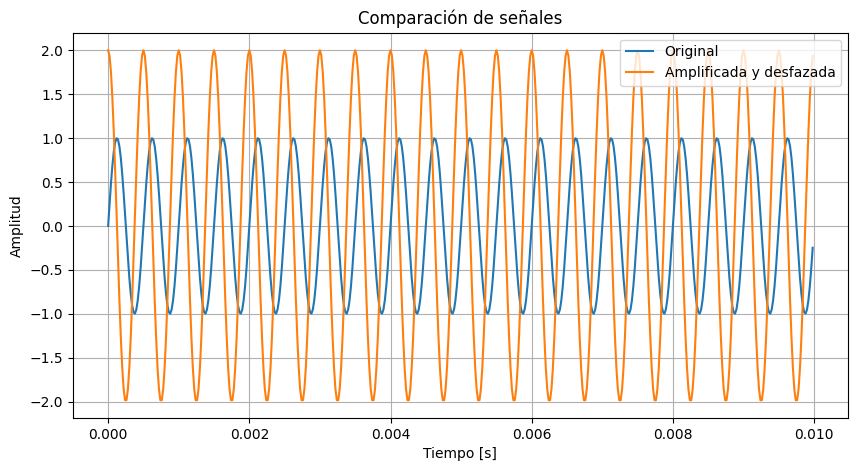

In [8]:
######################## Punto 1 y 2 ###################
# Señal original
AmplitudOriginal = 1
FrecuenciaOriginal = 2000

# Datos generales
fs = 50000
duracion = 0.01

t1, Original = generar_seno(amplitud = AmplitudOriginal, frecuencia = FrecuenciaOriginal,
                      fase=0, fs=fs, duracion=duracion)

# Señal amplificada y desfazada

t2, y2 = generar_seno(amplitud = AmplitudOriginal * 2, frecuencia = FrecuenciaOriginal, 
                      fase = np.pi/2, fs=fs, duracion=duracion)

# Graficar ambas en la misma figura
plt.figure(figsize=(10,5))
plt.plot(t1, Original, label="Original")
plt.plot(t2, y2, label="Amplificada y desfazada")
plt.title("Comparación de señales")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()

Se grafica en el mismo grafico, para poder apreciar la diferencia en la fase y en la amplitud, la señal senoidal original de 2KHz (azul) y la señal amplifacada y desfazada (naranja).

## Conclusiones

## Autoevalucion de Aprendizaje